# Peaks in EBAS-Lev3 trends product for station Cape Point

When comparing EBAS-RAW and EBAS-Lev3 scattering coefficients in [trends interface](aerocom.met.no/trends/) at station Cape Point (South Africa), two peaks occur in daily data at 2. Feb. 2006 and 4. April 2007, that are not visible in EBAS-RAW product. 

The reasons for that is, that in the EBAS-Lev3 product, data points that are higher than 50% RH are removed from the original hourly data. When downscaling to daily (as seen in trends interface), the high values in the hourly data (which are not flagged as high RH and thus remain), are weighted stronger and thus, these peaks are more pronounced here.

In [1]:
import pyaerocom as pya

Init data paths for lustre


0.027651071548461914 s


In [2]:
reader = pya.io.ReadEbas()

### Get all files that are of relevance

In [3]:
files = reader.get_file_list('scatc550aer', station_names=['Cape*Point*'])
files

['/lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/EBASMultiColumn/data/data/ZA0001G.20060101000000.20150916120046.nephelometer..pm10.1y.1h.ZA02L_TSI_3563_CPT_pm10.ZA02L_scat_coef.lev2.nas',
 '/lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/EBASMultiColumn/data/data/ZA0001G.20070101000000.20150916120046.nephelometer..pm10.1y.1h.ZA02L_TSI_3563_CPT_pm10.ZA02L_scat_coef.lev2.nas',
 '/lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/EBASMultiColumn/data/data/ZA0001G.20080101000000.20150916120046.nephelometer..pm10.1y.1h.ZA02L_TSI_3563_CPT_pm10.ZA02L_scat_coef.lev2.nas',
 '/lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/EBASMultiColumn/data/data/ZA0001G.20090101000000.20150916120046.nephelometer..pm10.1y.1h.ZA02L_TSI_3563_CPT_pm10.ZA02L_scat_coef.lev2.nas',
 '/lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/EBASMultiColumn/data/data/ZA0001G.20100101000000.20150916120046.nephelometer..pm10.1y.1h.ZA02L_TSI_3563_CPT_pm10.ZA02L_scat_coef.lev2.nas',
 '/lustre/

### Read 2. file as example (contains 2. peak on 4.4.2007)

In [4]:
data = pya.io.EbasNasaAmesFile(files[1])

#### Extract scattering data and RH data

In [5]:
rh_col = 3
print(data.var_defs[rh_col])

data_col = 17
print(data.var_defs[rh_col])

Pyaerocom EbasColDef
--------------------
name: relative_humidity
unit: %
is_var: True
is_flag: False
flag_col: 23
location: instrument internal
statistics: arithmetic mean
matrix: instrument
detection_limit: 
detection_limit_expl.: 

Pyaerocom EbasColDef
--------------------
name: relative_humidity
unit: %
is_var: True
is_flag: False
flag_col: 23
location: instrument internal
statistics: arithmetic mean
matrix: instrument
detection_limit: 
detection_limit_expl.: 



In [6]:
rh = data.data[:, rh_col]
ext = data.data[:, data_col]

### Extract data around day of interest (4. April 2007) and illustrate issue

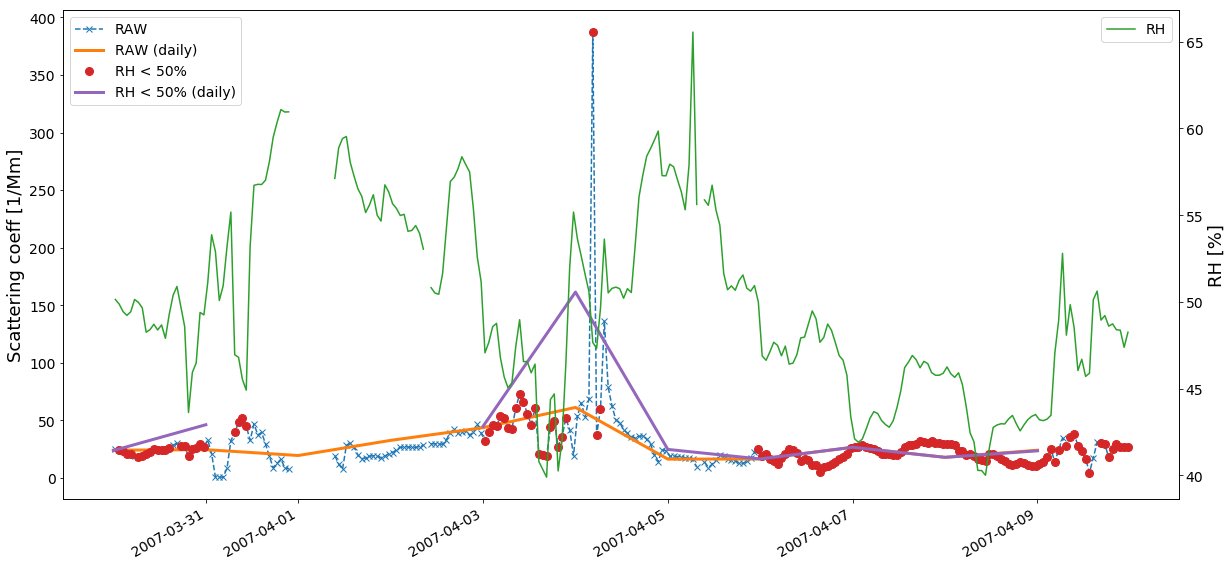

In [7]:
time = data.time_stamps
import numpy as np
start = np.datetime64('2007-03-30T00:00:00')
stop = np.datetime64('2007-04-10T00:00:00')

mask = np.logical_and(start <= time, time < stop)

raw = pd.Series(ext[mask], time[mask])

daily_raw = raw.resample('D').mean()

rhdata = pd.Series(rh[mask], time[mask])

ax = raw.plot(figsize=(20, 10), label='RAW', style='--x')
ax.plot(daily_raw, lw=3, label='RAW (daily)')
ax1 = rhdata.plot(secondary_y=True, ax=ax, label='RH')

ax1.set_ylabel('RH [%]')
ax.set_ylabel('Scattering coeff [1/Mm]')

rhmask = rhdata > 50

raw[rhmask] = np.nan
daily_dry = raw.resample('D').mean()
ax.plot(raw, ' o',ms=8,  label='RH < 50%')
ax.plot(daily_dry, lw=3, label='RH < 50% (daily)')

ax.legend(loc=2)
leg = ax1.legend(loc=1)

As you can see, many datapoints have high RH (green, plotted on right axis). However, the high value on 4. April has not and is thus weighted stronger in the daily product of the level-3 data (purple line) compared to the daily product computed from the raw data (orange line).

### Reproduce full time series as seen in trends interface

In [8]:
data = pya.io.ReadUngridded().read('EBASMC', ['scatc550aer', 'scatc550dryaer'], station_names=['Cape*Po*'])
print(data)

Received additional reading constraints, ignoring caching
No Cache match found for EBASMC in /home/jonasg/pyaerocom/_cache/jonasg. Reading from files (this may take a while)


Reading file 1 of 8 (ReadEbas)
Reading file 2 of 8 (ReadEbas)
Reading file 3 of 8 (ReadEbas)
Reading file 4 of 8 (ReadEbas)
Reading file 5 of 8 (ReadEbas)
Reading file 6 of 8 (ReadEbas)
Reading file 7 of 8 (ReadEbas)
Reading file 8 of 8 (ReadEbas)

Pyaerocom UngriddedData
-----------------------
Contains networks: ['EBASMC']
Contains variables: ['scatc550aer', 'scatc550dryaer']
Contains instruments: ['TSI_3563_CPT_pm10']
Total no. of meta-blocks: 1


#### Create time series both in original and daily resolution for scattering and dry scattering

In [9]:
cp = data.to_station_data(meta_idx=0)
cp1 = data.to_station_data(meta_idx=0, freq='daily')

#### Plot three time-series 

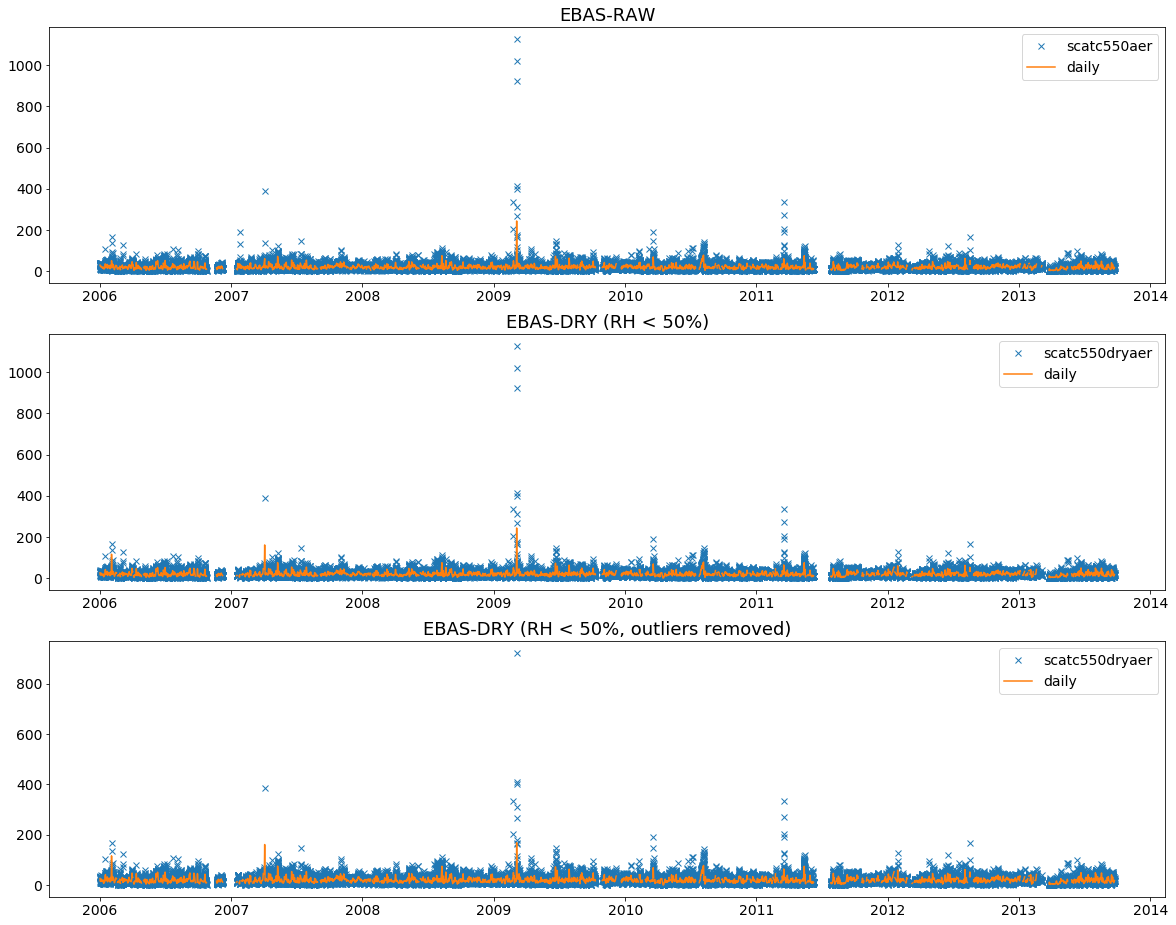

In [10]:
import matplotlib.pyplot as plt
fig, (ax, ax1, ax2) = plt.subplots(3,1, figsize=(20, 16))
res = ax.plot(cp.scatc550aer, ' x', label='scatc550aer')
ax.plot(cp1.scatc550aer, '-', label='daily')
ax.set_title('EBAS-RAW')
ax.legend()

res = ax1.plot(cp.scatc550dryaer, ' x', markerfacecolor='none', label='scatc550dryaer')
ax1.plot(cp1.scatc550dryaer, '-', label='daily')
ax1.set_title('EBAS-DRY (RH < 50%)')

ax1.legend()

data = cp.scatc550dryaer
data[data>1000] = np.nan
daily = data.resample('D').mean()

res = ax2.plot(data, ' x', markerfacecolor='none', label='scatc550dryaer')
ax2.plot(daily, '-', label='daily')
ax2.set_title('EBAS-DRY (RH < 50%, outliers removed)')

leg = ax2.legend()

- The first plot corresponds to the EBAS-RAW product as seen in the trends interface.
- The 3. plot corresponds to the EBAS-Lev3 product as seen in the trends interface.
